## Perceptron (Chapter 2)


Sources can be found in [perceptron.py](/edit/code/perceptron.py).

In [25]:
%matplotlib inline

In [26]:
from code import perceptron

In [27]:
data = pd.read_csv('data/simple.iris.csv')
data.head(5)

,f1,f2,y
0,5.1,1.4,-1.0
1,4.9,1.4,-1.0
2,4.7,1.3,-1.0
3,4.6,1.5,-1.0
4,5.0,1.4,-1.0


In [28]:
X = data.values[:, :2]
y = data.values[:, 2]
y = y.reshape(len(y), 1)[:, 0]
weights, errors = perceptron.fit(X, y)

In [29]:
weights

array([-0.04 , -0.068,  0.182])

In [30]:
errors

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

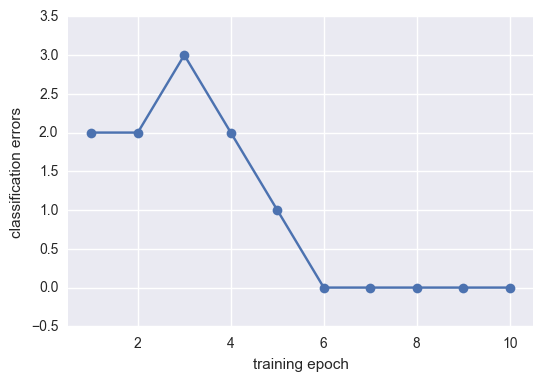

In [32]:
xs = range(1, len(errors) + 1)
plt.plot(xs, errors, marker='o')
plt.ylim(min(errors) - 0.5, max(errors) + 0.5)
plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
plt.xlabel('training epoch')
plt.ylabel('classification errors')


In [33]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    cmap = ListedColormap(sns.color_palette()[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T, weights)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

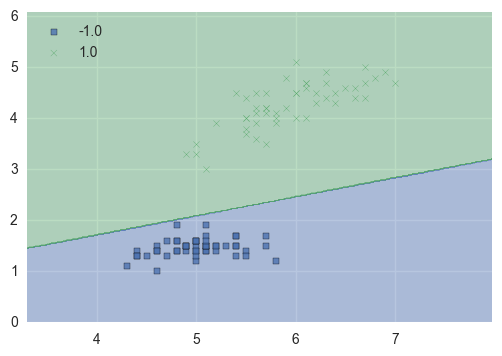

In [35]:
plot_decision_regions(X, y, classifier=perceptron)
plt.legend(loc='upper left')